## Importing required Libraries

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import pandas as pd
from pandas import read_csv
import glob
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

## Reading data and preprocessing 

In [2]:
path ='/content/drive/MyDrive/Neural Network/charts/train_val.csv'
data = read_csv(path)
data.head(4)

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical


In [3]:
images = [cv2.imread(file) for file in glob.glob('/content/drive/MyDrive/Neural Network/charts/train_val/*.png')]

In [4]:
x_train_val = np.array(images)

In [5]:
x_train_val.shape

(1000, 128, 128, 3)

## EDA

In [6]:
x_train_val.shape

(1000, 128, 128, 3)

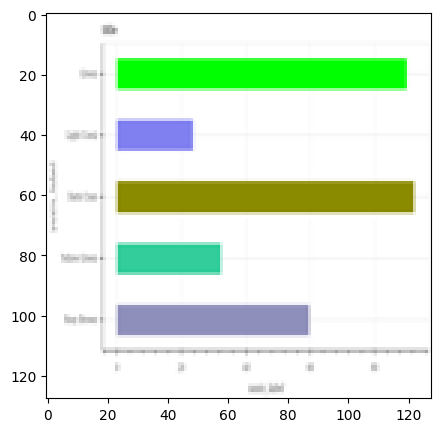

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(images[100])

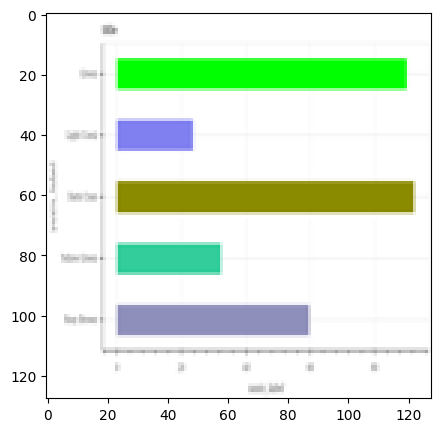

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(x_train_val[100])

In [9]:
x_train_val = np.array(x_train_val) / 255

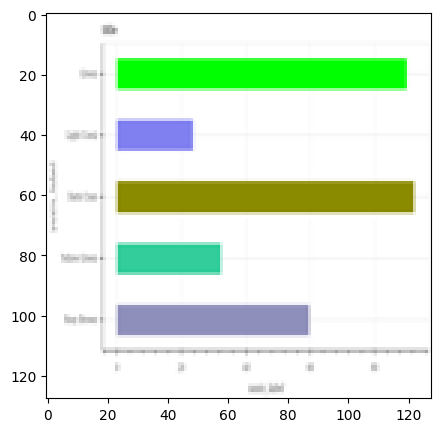

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(x_train_val[100])

In [11]:
x_train_val.shape

(1000, 128, 128, 3)

In [12]:
s = []
for name in glob.glob('/content/drive/MyDrive/Neural Network/charts/train_val/*[0-9].*'):
   #print(name)
   z=os.path.basename(name)
   x = z.replace(".png", " ")
   
   
   t = [int(s) for s in str.split(x) if s.isdigit()]
   #print(t)
   s.append(t)


In [13]:
y_train_val = np.array(s)

In [14]:
y_train_val.shape

(1000, 1)

In [15]:
y_train_val[0]

array([26])

In [16]:
y_train_val_cat = []
for i in y_train_val:
  m=int(y_train_val[i])
  k = data['type'][m]
  y_train_val_cat.append(k)

In [17]:
y_train_val_cat = np.array(y_train_val_cat)

In [18]:
u, indices = np.unique(y_train_val_cat, return_index=True)

In [19]:
u

array(['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical'],
      dtype='<U16')

In [20]:
df=pd.DataFrame(y_train_val_cat)

In [21]:
df.rename(columns = {0:'class'},inplace = True)

In [22]:
df.head(4)

,class
0,vbar_categorical
1,hbar_categorical
2,vbar_categorical
3,vbar_categorical


In [23]:
df['class'] = df['class'].replace(['dot_line'], 0)
df['class'] = df['class'].replace(['hbar_categorical'], 1)
df['class'] = df['class'].replace(['line'], 2)
df['class'] = df['class'].replace(['pie'], 3)
df['class'] = df['class'].replace(['vbar_categorical'], 4)



In [24]:
df.head(4)

,class
0,4
1,1
2,4
3,4


In [25]:
#y_train =  df.values
y_train = np.array(df)

In [26]:
array = df.values
y_train = array[:,0]

In [27]:
y_train.shape

(1000,)

In [28]:
num_classes = 5

In [29]:
y_train_o = keras.utils.np_utils.to_categorical(y_train, num_classes)

In [30]:
y_train_o.shape

(1000, 5)

In [31]:
y_train_o[1]

array([0., 1., 0., 0., 0.], dtype=float32)

splitting the input into training and validation

In [32]:
X_train, X_val, y_train, y_val = train_test_split(x_train_val, y_train_o, test_size=0.2, random_state=42)

##CNN model set up 

X_train , y_train

---


X_val , y_val

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(800, 128, 128, 3)
(800, 5)
(200, 128, 128, 3)
(200, 5)


In [ ]:
x=[0., 0., 0., 0., 0.]
for i in y_val:
    x = x + i

In [ ]:
x

array([40., 46., 35., 45., 34.])

In [ ]:
# multi layer CNN
'''
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(128,128,3),strides=(2,2),padding='SAME',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='Softmax'))
'''

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(128,128,3),strides=(1,1),padding='SAME',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
model.add(Flatten())
model.add(Dense(5,activation='Softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

## Run Model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)
model_fit = model.fit(X_train,y_train,steps_per_epoch = 3,epochs= 100,validation_data=(X_val,y_val),callbacks=[early_stop])
#model_fit = model.fit(X_train,y_train,steps_per_epoch = 3,epochs= 100,validation_data=(X_val,y_val))

Epoch 1/100
3/3 [==============================] - 49s 16s/step - loss: 71.6173 - accuracy: 0.1937 - val_loss: 116.1223 - val_accuracy: 0.2250
Epoch 2/100
3/3 [==============================] - 43s 15s/step - loss: 78.3673 - accuracy: 0.1900 - val_loss: 56.5269 - val_accuracy: 0.1750
Epoch 3/100
3/3 [==============================] - 45s 15s/step - loss: 44.1218 - accuracy: 0.2062 - val_loss: 18.4905 - val_accuracy: 0.1950
Epoch 4/100
3/3 [==============================] - 46s 16s/step - loss: 13.0453 - accuracy: 0.2313 - val_loss: 6.5434 - val_accuracy: 0.2300
Epoch 5/100
3/3 [==============================] - 42s 15s/step - loss: 4.5154 - accuracy: 0.2050 - val_loss: 3.0833 - val_accuracy: 0.1750
Epoch 6/100
3/3 [==============================] - 44s 15s/step - loss: 1.9728 - accuracy: 0.2875 - val_loss: 1.7063 - val_accuracy: 0.3500
Epoch 7/100
3/3 [==============================] - 42s 14s/step - loss: 1.2797 - accuracy: 0.4525 - val_loss: 1.5892 - val_accuracy: 0.4100
Epoch 8/100


## Model Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,71.617279,0.19375,116.122292,0.225
1,78.367287,0.19000,56.526875,0.175
2,44.121769,0.20625,18.490471,0.195
3,13.045269,0.23125,6.543436,0.230
4,4.515427,0.20500,3.083262,0.175
5,1.972771,0.28750,1.706310,0.350
6,1.279740,0.45250,1.589214,0.410
7,1.145849,0.54500,1.482083,0.400
8,1.019186,0.57250,1.524734,0.420
9,0.992380,0.58875,1.515778,0.370


<Axes: >

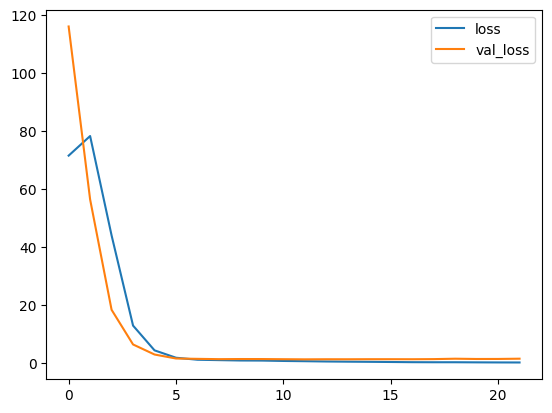

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

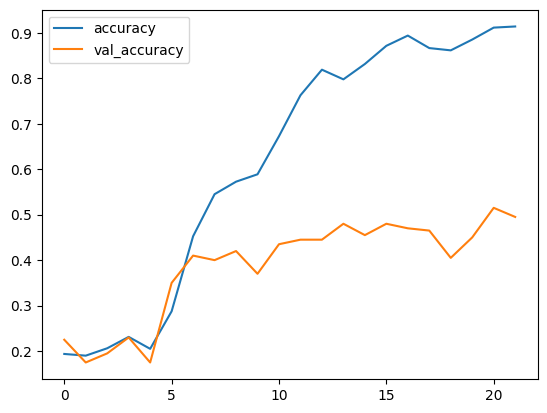

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_train,y_train,verbose=1)

25/25 [==============================] - 10s 384ms/step - loss: 0.3140 - accuracy: 0.9325


[0.3140135109424591, 0.9325000047683716]

In [ ]:
model.evaluate(X_val,y_val,verbose=1)

7/7 [==============================] - 2s 282ms/step - loss: 1.6408 - accuracy: 0.4950


[1.6407766342163086, 0.4950000047683716]

## Testing of the Model

df['class'] = df['class'].replace(['dot_line'], 0)
---
df['class'] = df['class'].replace(['dot_line'], 0)

---


df['class'] = df['class'].replace(['hbar_categorical'], 1)

---


df['class'] = df['class'].replace(['line'], 2)

---


df['class'] = df['class'].replace(['pie'], 3)

---


df['class'] = df['class'].replace(['vbar_categorical'], 4)


---



## Read Test Data 

In [ ]:
test_images = [cv2.imread(file) for file in glob.glob('/content/drive/MyDrive/Neural Network/charts/test/*.png')]
#/content/drive/MyDrive/Neural Network/charts/test

In [ ]:
x_test = np.array(test_images)

In [ ]:
x_test.shape

(50, 128, 128, 3)

In [ ]:
np.amax(x_test)

255

In [ ]:
x_test = x_test /255

In [ ]:
x_test.shape

(50, 128, 128, 3)

In [ ]:
np.amax(x_test)

1.0

## Perform testing

Pass : 0 , 1 ,3 , 4, 5 ,7,8,10

---


Fail : 2 ,6 ,9

In [ ]:
index=10
test_image = x_test[index]
y_predict = np.argmax(model.predict(test_image.reshape(1,128,128,3)))
if y_predict == 0:
  print("predicted as:",'Dotted Line Graph')
else:
  if y_predict == 1:
      print("predicted as:",'HBar')
  else:
    if y_predict == 2:
      print("predicted as:",'Line Graph')
    else:
      if y_predict == 3:
       print("predicted as:",'Pie Chart')
      else:
        if y_predict == 4:
          print("predicted as:",'VBar')

 

1/1 [==============================] - 0s 60ms/step
predicted as: Dotted Line Graph


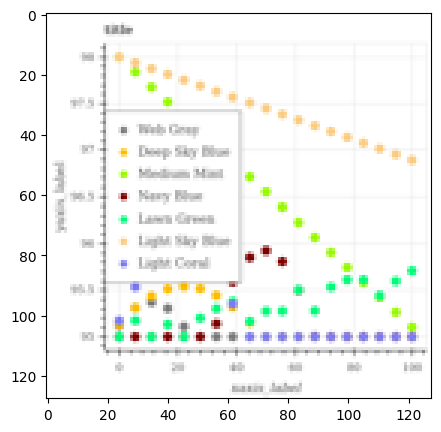

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(test_image)


## AlexNet Architecture 

In [52]:
model = Sequential()
model.add(Conv2D(filters=96,kernel_size=(11,11),input_shape=(128,128,3),strides=4,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
#model.add(Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(5,activation='softmax'))

ValueError: ignored

In [66]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(128,128,3),strides=4,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
#model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
#model.add(Conv2D(filters=32,kernel_size=(2,2),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [67]:
opt = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)
model_fit = model.fit(X_train,y_train,steps_per_epoch = 3,epochs= 100,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/100
3/3 [==============================] - 11s 3s/step - loss: 1.8359 - accuracy: 0.2000 - val_loss: 1.6088 - val_accuracy: 0.1700
Epoch 2/100
3/3 [==============================] - 11s 3s/step - loss: 1.6115 - accuracy: 0.1925 - val_loss: 1.6098 - val_accuracy: 0.1700
Epoch 3/100
3/3 [==============================] - 9s 3s/step - loss: 1.6080 - accuracy: 0.1963 - val_loss: 1.6060 - val_accuracy: 0.2400
Epoch 4/100
3/3 [==============================] - 9s 3s/step - loss: 1.5994 - accuracy: 0.2375 - val_loss: 1.5913 - val_accuracy: 0.2250
Epoch 5/100
3/3 [==============================] - 11s 4s/step - loss: 1.5816 - accuracy: 0.2400 - val_loss: 1.5836 - val_accuracy: 0.2400
Epoch 6/100
3/3 [==============================] - 9s 3s/step - loss: 1.5525 - accuracy: 0.2700 - val_loss: 1.5019 - val_accuracy: 0.3000
Epoch 7/100
3/3 [==============================] - 11s 4s/step - loss: 1.4536 - accuracy: 0.3462 - val_loss: 1.5815 - val_accuracy: 0.2900
Epoch 8/100
3/3 [=============

<Axes: >

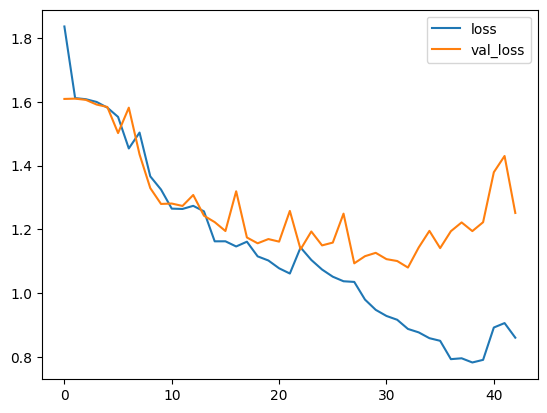

In [70]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

<Axes: >

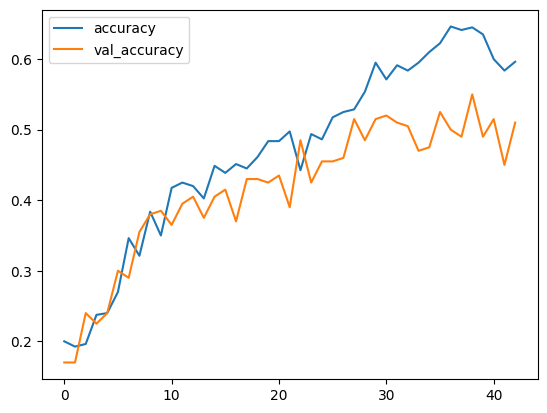

In [71]:
metrics[['accuracy','val_accuracy']].plot()

In [72]:
model.evaluate(X_train,y_train,verbose=1)

25/25 [==============================] - 2s 78ms/step - loss: 0.8208 - accuracy: 0.6400


[0.8207862973213196, 0.6399999856948853]

In [73]:
model.evaluate(X_val,y_val,verbose=1)

7/7 [==============================] - 1s 123ms/step - loss: 1.2515 - accuracy: 0.5100


[1.2514606714248657, 0.5099999904632568]

## Enhancing the Model performance

In [74]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(128,128,3),strides=(2,2),padding='SAME',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='Softmax'))

In [75]:
opt = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=10)
model_fit = model.fit(X_train,y_train,steps_per_epoch = 3,epochs= 100,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/100
3/3 [==============================] - 25s 8s/step - loss: 8.8590 - accuracy: 0.2062 - val_loss: 3.9287 - val_accuracy: 0.2250
Epoch 2/100
3/3 [==============================] - 16s 5s/step - loss: 4.2625 - accuracy: 0.1988 - val_loss: 2.2074 - val_accuracy: 0.2250
Epoch 3/100
3/3 [==============================] - 15s 5s/step - loss: 2.0898 - accuracy: 0.1950 - val_loss: 1.7730 - val_accuracy: 0.1900
Epoch 4/100
3/3 [==============================] - 16s 4s/step - loss: 1.7096 - accuracy: 0.2275 - val_loss: 1.6630 - val_accuracy: 0.2450
Epoch 5/100
3/3 [==============================] - 15s 5s/step - loss: 1.6149 - accuracy: 0.2837 - val_loss: 1.6045 - val_accuracy: 0.2400
Epoch 6/100
3/3 [==============================] - 15s 6s/step - loss: 1.5489 - accuracy: 0.3537 - val_loss: 1.5498 - val_accuracy: 0.3500
Epoch 7/100
3/3 [==============================] - 16s 5s/step - loss: 1.4779 - accuracy: 0.3913 - val_loss: 1.5282 - val_accuracy: 0.3300
Epoch 8/100
3/3 [==========

<Axes: >

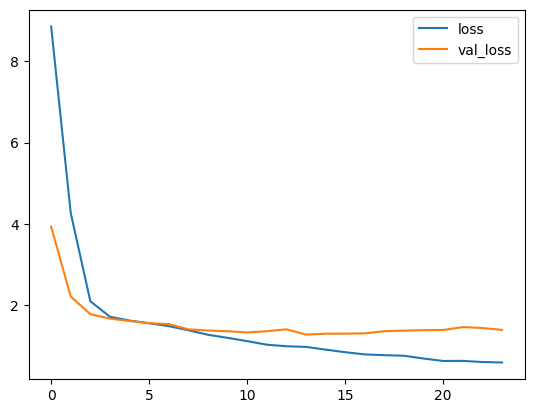

In [76]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

<Axes: >

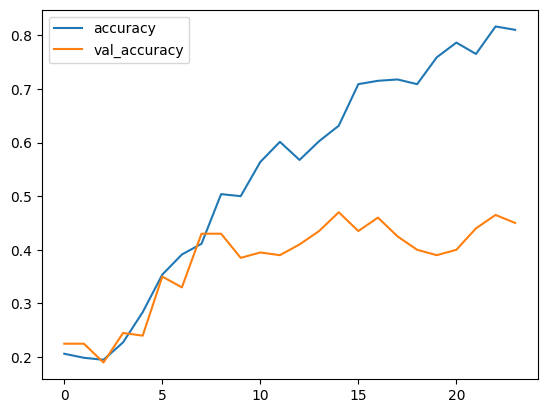

In [77]:
metrics[['accuracy','val_accuracy']].plot()

In [78]:
model.evaluate(X_train,y_train,verbose=1)

25/25 [==============================] - 3s 102ms/step - loss: 0.5231 - accuracy: 0.8462


[0.5230866074562073, 0.8462499976158142]

In [79]:
model.evaluate(X_val,y_val,verbose=1)

7/7 [==============================] - 1s 74ms/step - loss: 1.3854 - accuracy: 0.4500


[1.385362982749939, 0.44999998807907104]